<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/3_3_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 케라스의 내장 데이터셋에서 mnist dataset load
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)     # 데이터셋의 크기, 이미지의 세로/가로의 픽셀 크기
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


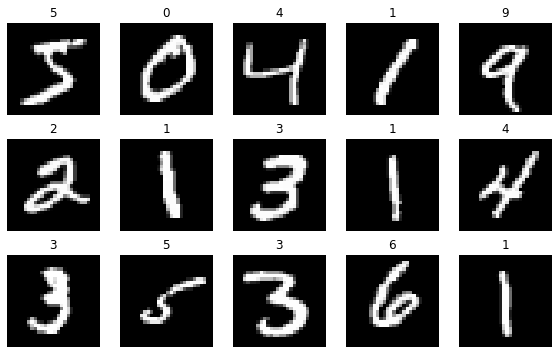

In [ ]:
# 데이터 시각화(trainset의 처음 15장에 대한)

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)        # 각각 그림의 너비와 높이를 인치 단위로 나타냄

for i in range(15):
    ax = axes[i//5, i%5]      # 몫과 나머지로 자리 분배
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')       # 축 표시 안 함
    ax.set_title(str(y_train[i]))   # 각 그림 상단에 label 표시

plt.tight_layout()         # 서브 플롯간에 올바른 간격을 자동으로 유지하게 함
plt.show()

# Data Prepocessing

In [ ]:
# x_train 배열의 데이터 확인(각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭)
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화(데이터 값 0~1로)
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test set에도 정규화 동일 적용
x_test = x_test / x_test.max()

# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

정규화하는 이유: input data가 정규화되어 모델이 학습하는 경우에 경사하강법 알고리즘에 의한 수렴 속도가 비정규화된 input data를 가질 때보다 더 빨리 수렴하기 때문/ local optimum에 빠지는 현상 방지

# Flatten layer & Activation Function

Dense layer에는 input value로 반드시 1D-array가 들어가야 한다.

In [ ]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

print(f'변경 전 shape: {x_train.shape}')

# Flatten layer 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)
변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


Activation Function은 input을 nonlinear output으로 변환해주는 함수이다.
비선형성을 추가하지 않고 선형 함수로만 층을 구성한다면 모델을 깊게 구성하더라도 결국은 선형함수로 표현된다.
Sigmoid, tanh(Hyperbolic Tangent), ReLU(Rectified Unit), Leaky ReLU 등이 있다.

In [ ]:
# Dense layer에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

# Dense layer와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

위와 같이 별도의 층으로 적용하는 경우는 Dense layer 다음에 Batch Normalization을 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용된다.

# Input&Output

Model의 깊이(layer의 수)와 너비(각 layer 구성하는 노드의 수)에는 정답이 없다. => Hyperparameters

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일)
        tf.keras.layers.Dense(10, activation='softmax')
])

# 출력층 노드 = 1개인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

# Loss Function & Optimizer & Metrics

In [ ]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')

optimizer는 loss를 낮추기 위해 신경망의 가중치와 학습률 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법이다. 일반적으로 많이 사용되는 알고리즘은 Adam이다.

In [ ]:
# 클래스 인스턴스로 지정(lr같은 하이퍼파라미터 직접 설정 가능)
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


metrics는 'accuracy'가 가장 많이 사용되며 'auc','precision','recall' 등의 지표도 많이 사용된다.

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training & Evaluation & Prediction

In [ ]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs = 10,
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2288 - accuracy: 0.9327 - val_loss: 0.1249 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0945 - accuracy: 0.9706 - val_loss: 0.0919 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0704 - val_accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0683 - val_accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0802 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0926 - val_accuracy: 0.9730
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0692 - val_accu

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9798
검증 셋 정확도: 0.9797999858856201


In [ ]:
# 예측(여기서는 예측에 필요한 new dataset이 준비되어 있지 않은 관계로)
predictions = model.predict(x_test)

# 예측 결과 출력(model의 output 노드 개수가 10개로 지정되었으므로 10개 값이 출력됨)
print(predictions[0])

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

[5.5308974e-10 4.0086540e-08 5.9508183e-11 8.9004050e-07 4.2178955e-11
 1.0728016e-08 8.5029102e-12 9.9999559e-01 8.2908808e-10 3.6202362e-06]
7
[7 2 1 0 4 1 4 9 5 9]


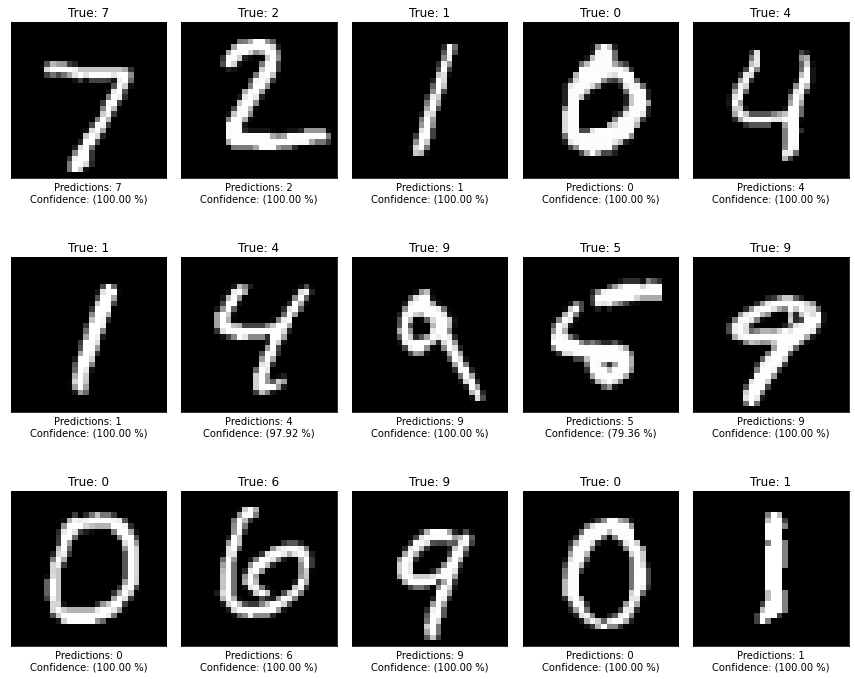

In [ ]:
# 데이터 시각화
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), \
                                     100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)
for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Predictions: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()               # 서브 플롯간에 올바른 간격을 자동으로 유지하게 함
plt.show()